# IMPORT LIBRARIES

In [26]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [2]:

housing = fetch_california_housing(as_frame=True)
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

# DISCOVER AND VISUALIZE

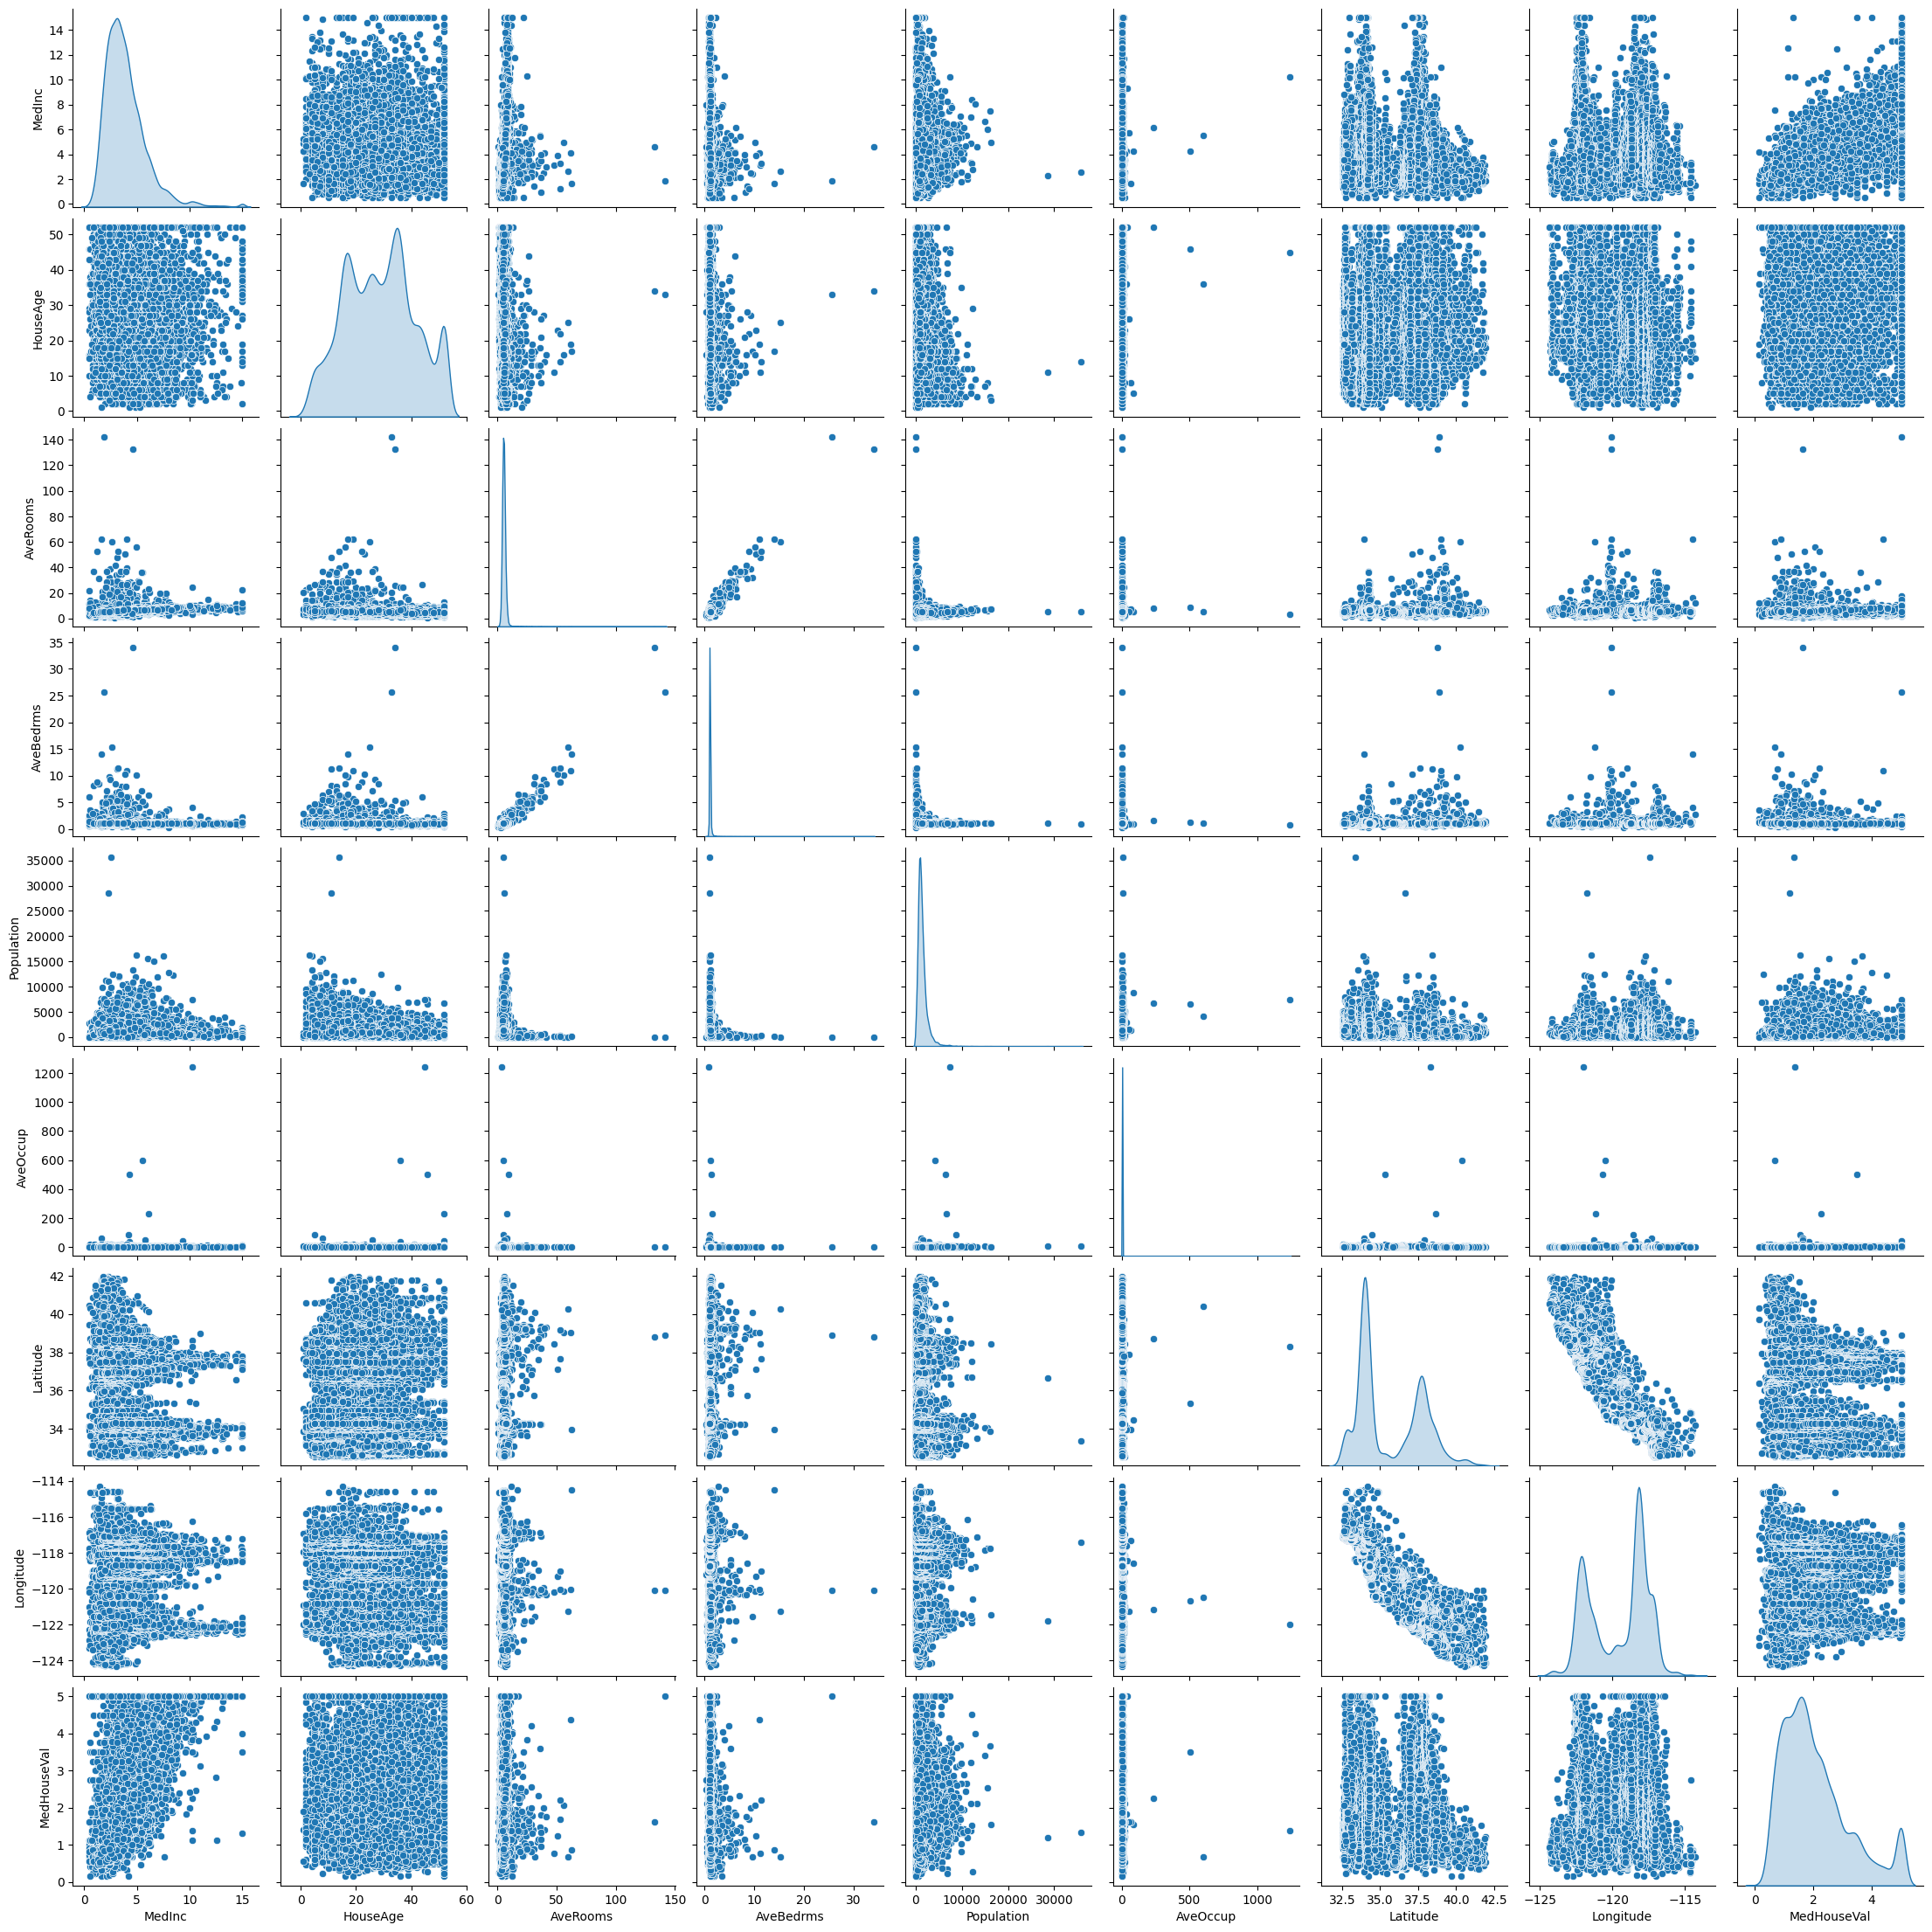

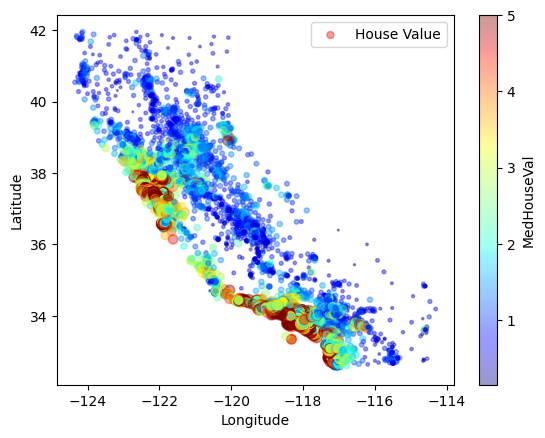

In [3]:
housing_df.describe()

# Pair plot
sns.pairplot(housing_df, diag_kind='kde')
plt.show()

# Scatter plot for geographical data
housing_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4,
                s=housing_df['MedHouseVal']*10, label="House Value",
                c='MedHouseVal', cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()


In [4]:
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
lr_model.fit(X_train_scaled, y_train)

# 2. Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
tree_model.fit(X_train_scaled, y_train)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_model.fit(X_train_scaled, y_train)

# 4. Support Vector Regressor
svr_model = SVR(kernel='linear')
svr_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [6]:
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


Linear Regression - MSE: 0.5558915986952442, MAE: 0.5332001304956565, R²: 0.575787706032451
Decision Tree - MSE: 0.49396854311945243, MAE: 0.45390448401162786, R²: 0.6230424613065773
Random Forest - MSE: 0.255169737347244, MAE: 0.3274252027374032, R²: 0.8052747336256919
SVR - MSE: 0.5792716048598867, MAE: 0.511978247481055, R²: 0.5579459432294915


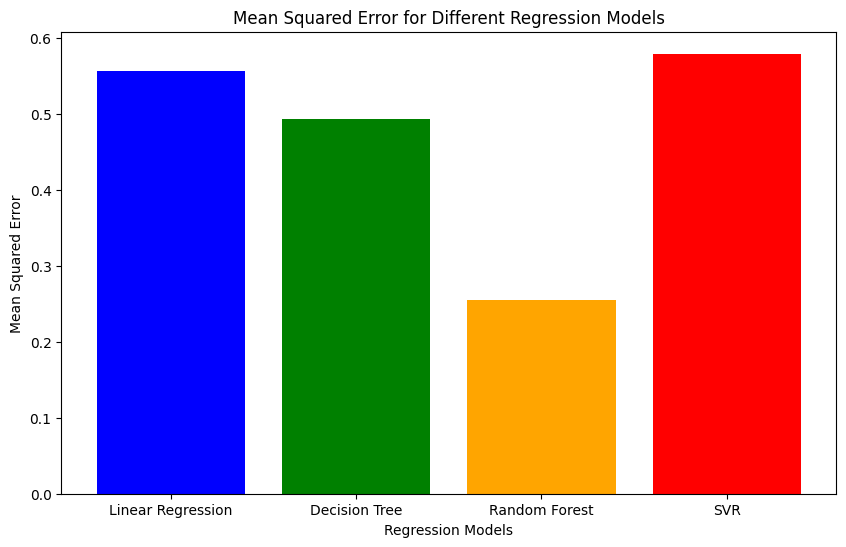

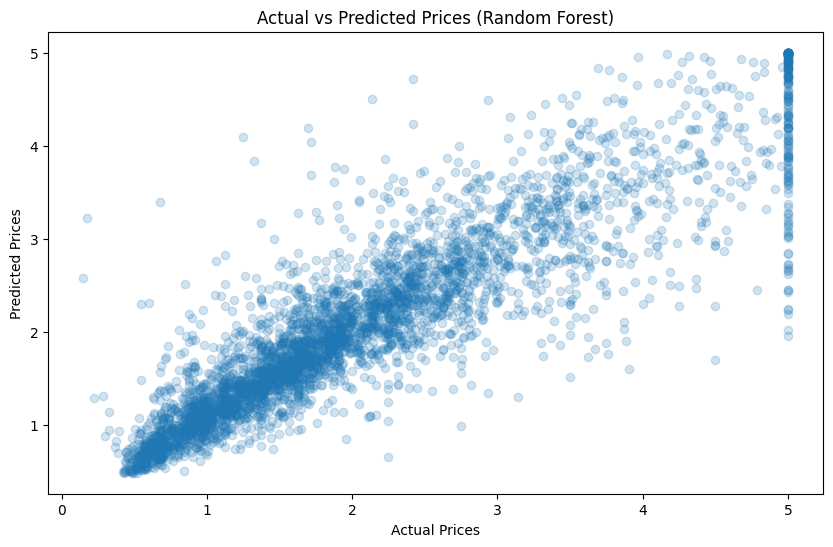

In [8]:
models = [lr_model, tree_model, rf_model, svr_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mse_values = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, MAE: {mae}, R²: {r2}')

# Bar chart for Mean Squared Error of different models
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Mean Squared Error for Different Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Scatter plot of Actual vs Predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model.predict(X_test_scaled), alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()

In [9]:
joblib.dump(rf_model, 'rf_model(standsc_0.2_5).pkl')


['rf_model(standsc_0.2_5).pkl']

# standard scalar
# 60:40
# 5 folds

In [10]:
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
lr_model.fit(X_train_scaled, y_train)

# 2. Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
tree_model.fit(X_train_scaled, y_train)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_model.fit(X_train_scaled, y_train)

# 4. Support Vector Regressor
svr_model = SVR(kernel='linear')
svr_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [12]:
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


Linear Regression - MSE: 0.543594524797457, MAE: 0.533686487452728, R²: 0.5939400468776981
Decision Tree - MSE: 0.5471702552899225, MAE: 0.475574534883721, R²: 0.5912690101215983
Random Forest - MSE: 0.27060286151468405, MAE: 0.34202537122093046, R²: 0.7978622295683442
SVR - MSE: 0.5720059481605244, MAE: 0.5180900978033248, R²: 0.5727169831552597


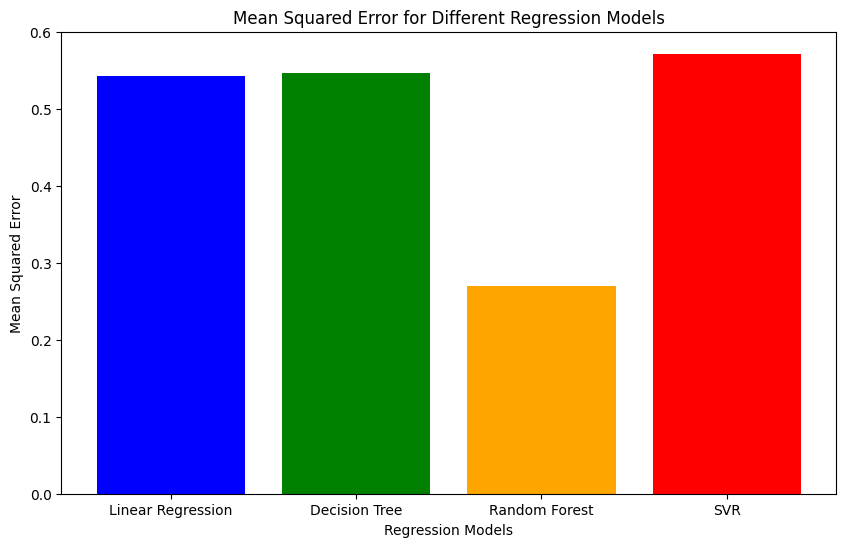

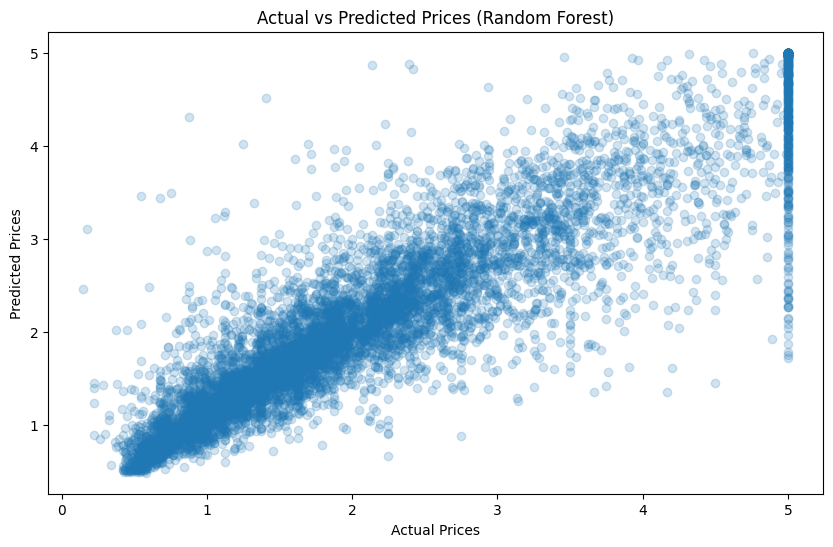

In [13]:
models = [lr_model, tree_model, rf_model, svr_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mse_values = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, MAE: {mae}, R²: {r2}')

# Bar chart for Mean Squared Error of different models
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Mean Squared Error for Different Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Scatter plot of Actual vs Predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model.predict(X_test_scaled), alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()

In [14]:
joblib.dump(rf_model, 'rf_model(standsc_0.4_5).pkl')


['rf_model(standsc_0.4_5).pkl']

# standard scalr
# 0.2
# folds =10

In [15]:
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
lr_model.fit(X_train_scaled, y_train)

# 2. Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
tree_model.fit(X_train_scaled, y_train)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rf_model.fit(X_train_scaled, y_train)

# 4. Support Vector Regressor
svr_model = SVR(kernel='linear')
svr_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

Linear Regression - MSE: 0.5558915986952442, MAE: 0.5332001304956565, R²: 0.575787706032451
Decision Tree - MSE: 0.49396854311945243, MAE: 0.45390448401162786, R²: 0.6230424613065773
Random Forest - MSE: 0.255169737347244, MAE: 0.3274252027374032, R²: 0.8052747336256919
SVR - MSE: 0.5792716048598867, MAE: 0.511978247481055, R²: 0.5579459432294915


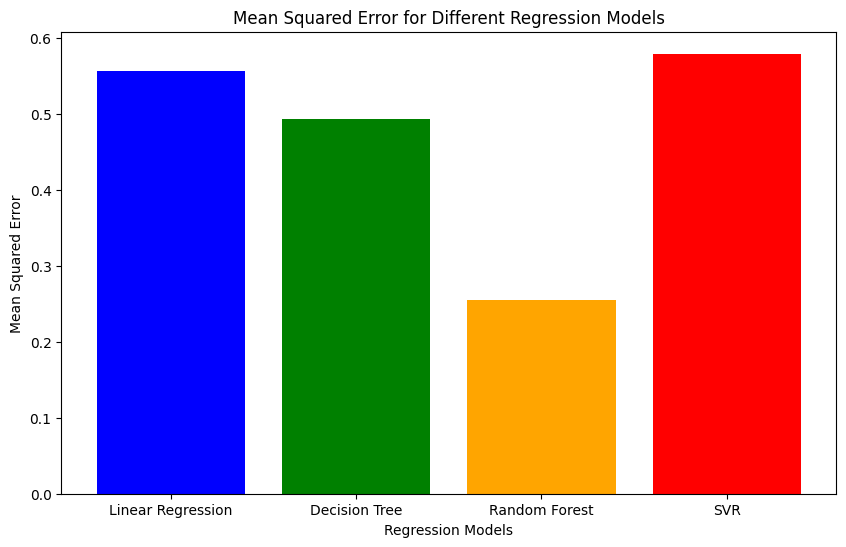

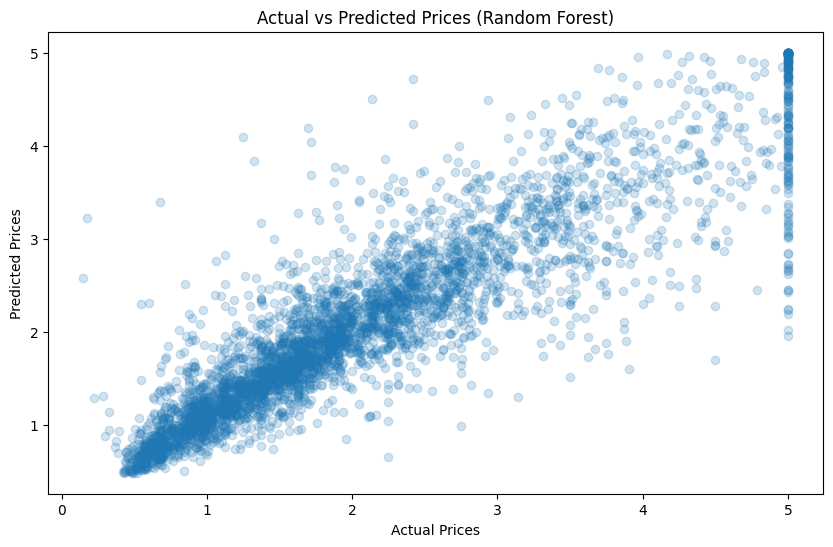

In [17]:
models = [lr_model, tree_model, rf_model, svr_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mse_values = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, MAE: {mae}, R²: {r2}')

# Bar chart for Mean Squared Error of different models
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Mean Squared Error for Different Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Scatter plot of Actual vs Predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model.predict(X_test_scaled), alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()

In [18]:
joblib.dump(rf_model, 'rf_model(standsc_0.2_10).pkl')


['rf_model(standsc_0.2_10).pkl']

# standard scalar
# 0.4
# folds 10

In [21]:
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
lr_model.fit(X_train_scaled, y_train)

# 2. Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
tree_model.fit(X_train_scaled, y_train)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rf_model.fit(X_train_scaled, y_train)

# 4. Support Vector Regressor
svr_model = SVR(kernel='linear')
svr_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

Linear Regression - MSE: 0.543594524797457, MAE: 0.533686487452728, R²: 0.5939400468776981
Decision Tree - MSE: 0.5471702552899225, MAE: 0.475574534883721, R²: 0.5912690101215983
Random Forest - MSE: 0.27060286151468405, MAE: 0.34202537122093046, R²: 0.7978622295683442
SVR - MSE: 0.5720059481605244, MAE: 0.5180900978033248, R²: 0.5727169831552597


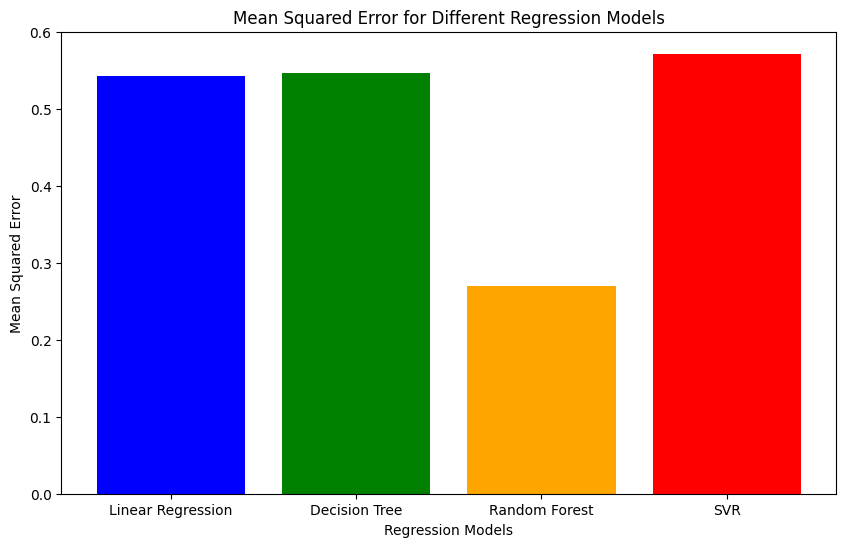

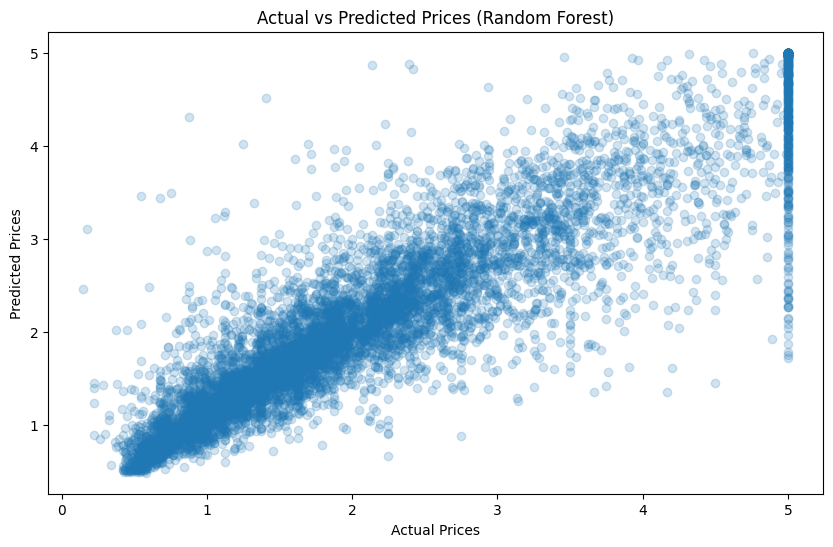

In [23]:
models = [lr_model, tree_model, rf_model, svr_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mse_values = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, MAE: {mae}, R²: {r2}')

# Bar chart for Mean Squared Error of different models
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Mean Squared Error for Different Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Scatter plot of Actual vs Predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model.predict(X_test_scaled), alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()

In [24]:
joblib.dump(rf_model, 'rf_model(standsc_0.4_10).pkl')


['rf_model(standsc_0.4_10).pkl']

# ........................................
 # standard scalr place replaced by minmax()  

In [27]:
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
lr_model.fit(X_train_scaled, y_train)

# 2. Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
tree_model.fit(X_train_scaled, y_train)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_model.fit(X_train_scaled, y_train)

# 4. Support Vector Regressor
svr_model = SVR(kernel='linear')
svr_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [29]:
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


Linear Regression - MSE: 0.5558915986952438, MAE: 0.5332001304956557, R²: 0.5757877060324512
Decision Tree - MSE: 0.5001548768062742, MAE: 0.45784148013565895, R²: 0.6183215430363695
Random Forest - MSE: 0.2563347708642612, MAE: 0.3275384558624032, R²: 0.8043856726253765
SVR - MSE: 0.570822399443688, MAE: 0.5229757597255479, R²: 0.5643937053835184


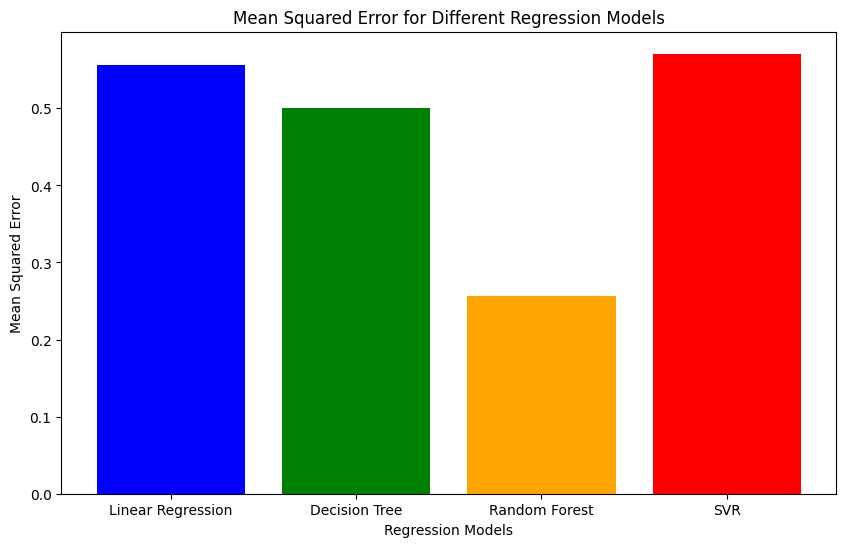

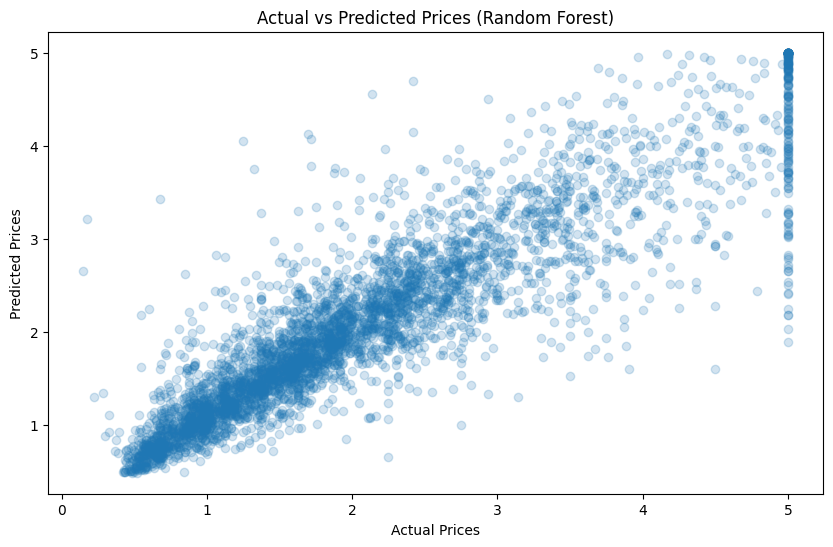

In [30]:
models = [lr_model, tree_model, rf_model, svr_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mse_values = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, MAE: {mae}, R²: {r2}')

# Bar chart for Mean Squared Error of different models
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Mean Squared Error for Different Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Scatter plot of Actual vs Predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model.predict(X_test_scaled), alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()

In [31]:
joblib.dump(rf_model, 'rf_model(MINMAX_0.2_5).pkl')


['rf_model(MINMAX_0.2_5).pkl']

# minmax 0.2 10

In [32]:
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
lr_model.fit(X_train_scaled, y_train)

# 2. Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
tree_model.fit(X_train_scaled, y_train)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rf_model.fit(X_train_scaled, y_train)

# 4. Support Vector Regressor
svr_model = SVR(kernel='linear')
svr_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [34]:
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


Linear Regression - MSE: 0.5558915986952438, MAE: 0.5332001304956557, R²: 0.5757877060324512
Decision Tree - MSE: 0.5001548768062742, MAE: 0.45784148013565895, R²: 0.6183215430363695
Random Forest - MSE: 0.2563347708642612, MAE: 0.3275384558624032, R²: 0.8043856726253765
SVR - MSE: 0.570822399443688, MAE: 0.5229757597255479, R²: 0.5643937053835184


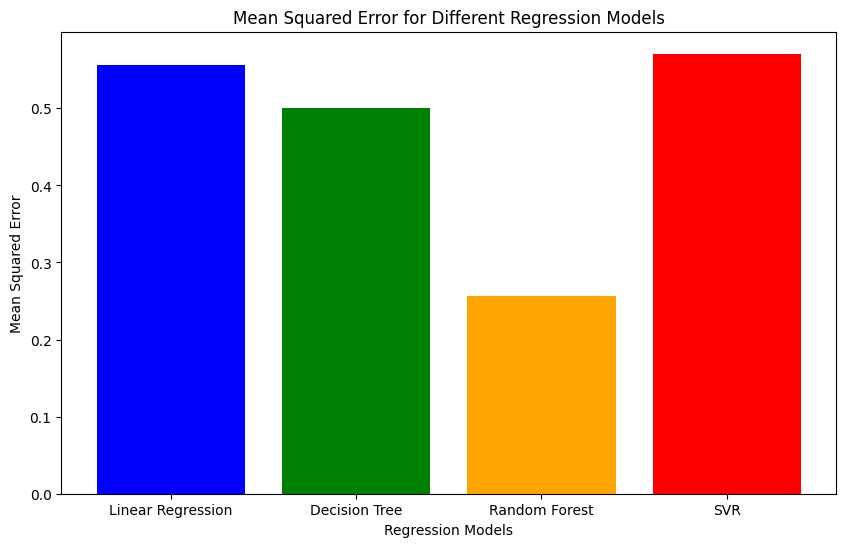

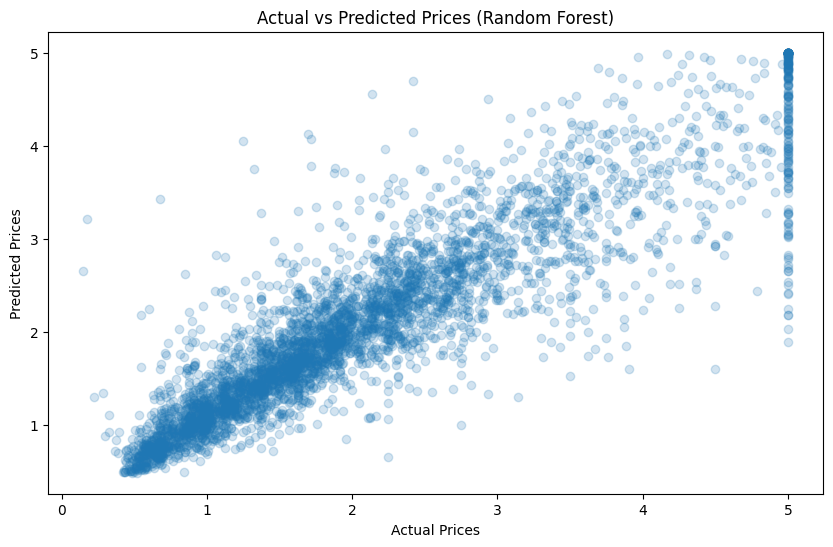

In [35]:
models = [lr_model, tree_model, rf_model, svr_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mse_values = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, MAE: {mae}, R²: {r2}')

# Bar chart for Mean Squared Error of different models
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Mean Squared Error for Different Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Scatter plot of Actual vs Predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model.predict(X_test_scaled), alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()

In [36]:
joblib.dump(rf_model, 'rf_model(MINMAX_0.2_10).pkl')


['rf_model(MINMAX_0.2_10).pkl']

# MIN MAX SCALING
# 0.4 5

In [37]:
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
lr_model.fit(X_train_scaled, y_train)

# 2. Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
tree_model.fit(X_train_scaled, y_train)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_model.fit(X_train_scaled, y_train)

# 4. Support Vector Regressor
svr_model = SVR(kernel='linear')
svr_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [39]:
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


Linear Regression - MSE: 0.5435945247974568, MAE: 0.5336864874527272, R²: 0.5939400468776981
Decision Tree - MSE: 0.548320286925327, MAE: 0.4747100956879845, R²: 0.5904099473999208
Random Forest - MSE: 0.27146011134453196, MAE: 0.34268899396802344, R²: 0.7972218720778933
SVR - MSE: 0.5666942148310494, MAE: 0.5263644262987711, R²: 0.5766847975617209


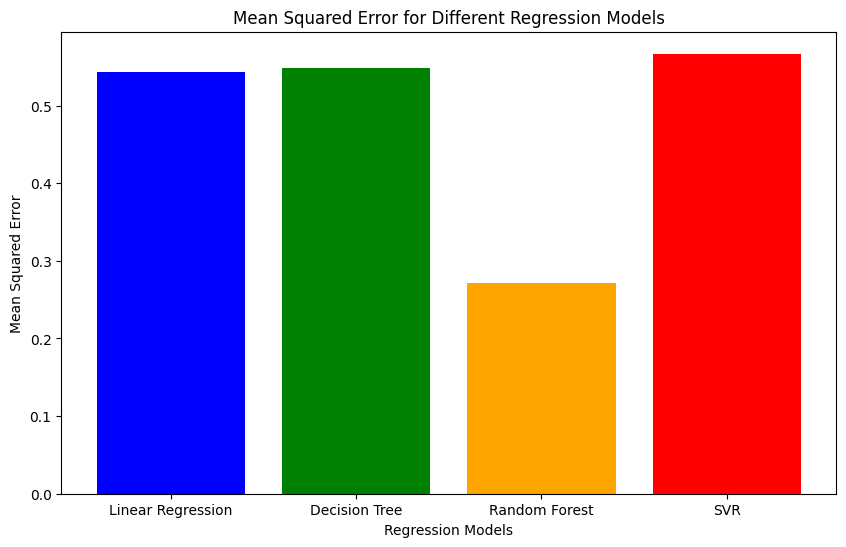

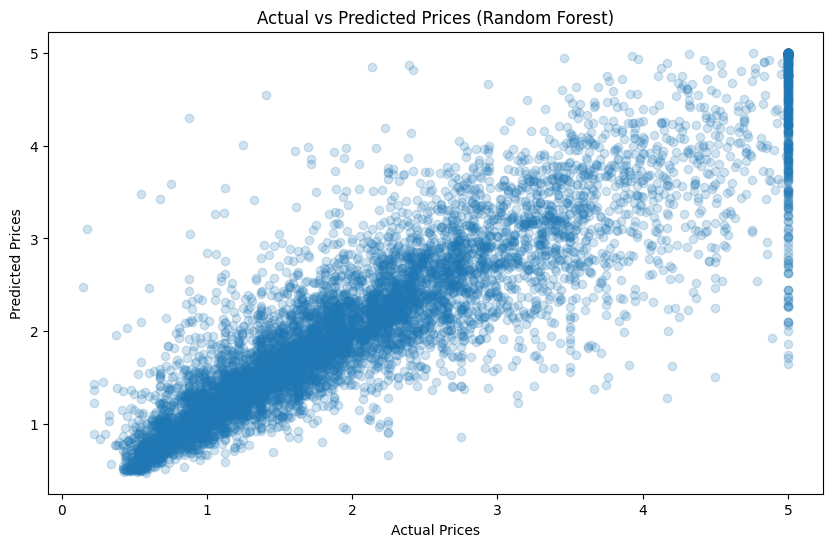

In [40]:
models = [lr_model, tree_model, rf_model, svr_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mse_values = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, MAE: {mae}, R²: {r2}')

# Bar chart for Mean Squared Error of different models
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Mean Squared Error for Different Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Scatter plot of Actual vs Predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model.predict(X_test_scaled), alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()

In [41]:
joblib.dump(rf_model, 'rf_model(MINMAX_0.4_5).pkl')


['rf_model(MINMAX_0.4_5).pkl']

# MIN MAX
# 0.4
# 10

In [42]:
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
lr_model.fit(X_train_scaled, y_train)

# 2. Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
tree_model.fit(X_train_scaled, y_train)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_model.fit(X_train_scaled, y_train)

# 4. Support Vector Regressor
svr_model = SVR(kernel='linear')
svr_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [44]:
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


Linear Regression - MSE: 0.5435945247974568, MAE: 0.5336864874527272, R²: 0.5939400468776981
Decision Tree - MSE: 0.548320286925327, MAE: 0.4747100956879845, R²: 0.5904099473999208
Random Forest - MSE: 0.27146011134453196, MAE: 0.34268899396802344, R²: 0.7972218720778933
SVR - MSE: 0.5666942148310494, MAE: 0.5263644262987711, R²: 0.5766847975617209


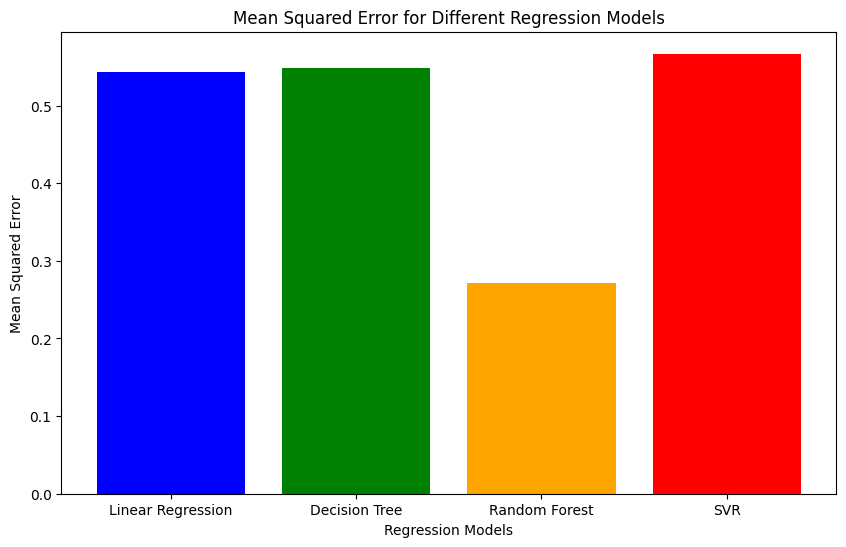

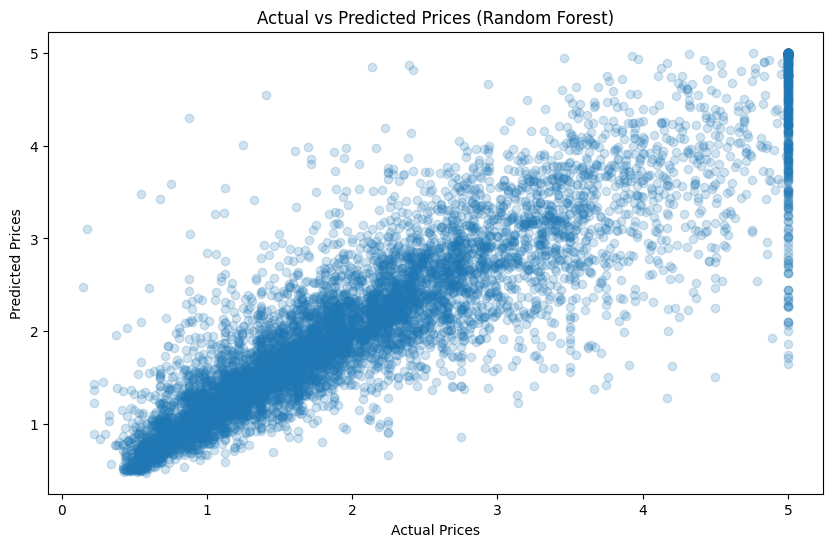

In [45]:
models = [lr_model, tree_model, rf_model, svr_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mse_values = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, MAE: {mae}, R²: {r2}')

# Bar chart for Mean Squared Error of different models
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Mean Squared Error for Different Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Scatter plot of Actual vs Predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model.predict(X_test_scaled), alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()

In [46]:
joblib.dump(rf_model, 'rf_model(MINMAX_0.4_10).pkl')


['rf_model(MINMAX_0.4_10).pkl']